In [222]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import plotly.express as px
from matplotlib import rcParams


In [223]:
steam_df = pd.read_csv('F:/PyCharm/Data Visualization/Steam Data/Valve_Player_Data.csv')
steam_df.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive


In [224]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month_Year    5271 non-null   object 
 1   Avg_players   5271 non-null   float64
 2   Gain          5173 non-null   float64
 3   Percent_Gain  5173 non-null   object 
 4   Peak_Players  5271 non-null   int64  
 5   URL           5271 non-null   object 
 6   Date          5271 non-null   object 
 7   Game_Name     5271 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 329.6+ KB


In [225]:
steam_df.describe()

,Avg_players,Gain,Peak_Players
count,5.271000e+03,5173.000000,5.271000e+03
mean,3.763149e+04,92.071786,7.032072e+04
std,1.032951e+05,15161.864515,1.941948e+05
min,0.000000e+00,-250248.990000,0.000000e+00
25%,6.720205e+03,-1374.480000,1.302900e+04
50%,1.235840e+04,-0.080000,2.344700e+04
75%,2.414976e+04,1255.140000,4.610150e+04
max,1.584887e+06,426446.120000,3.236027e+06


In [226]:
steam_df.columns

Index(['Month_Year', 'Avg_players', 'Gain', 'Percent_Gain', 'Peak_Players',
       'URL', 'Date', 'Game_Name'],
      dtype='object')

In [227]:
steam_df.isnull().sum()

Month_Year       0
Avg_players      0
Gain            98
Percent_Gain    98
Peak_Players     0
URL              0
Date             0
Game_Name        0
dtype: int64

In [228]:
steam_df['Month_Year'] = pd.to_datetime(steam_df['Month_Year'])
steam_df['Avg_players'] = steam_df['Avg_players'].astype('int')

data_clean = steam_df
data_clean=data_clean.dropna()

In [229]:
data_clean.isna().sum()

Month_Year      0
Avg_players     0
Gain            0
Percent_Gain    0
Peak_Players    0
URL             0
Date            0
Game_Name       0
dtype: int64

In [230]:
fig = pd.read_csv("Valve_Player_Data.csv", index_col=0, parse_dates=True)
fig.head()


,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
Month_Year,,,,,,,
2021-09-01,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
2021-08-01,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2021-07-01,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
2021-06-01,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
2021-05-01,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive


In [231]:
sd1 = data_clean.groupby('Game_Name', as_index=False, sort=True)[
    'Avg_players'].mean()

sd1 = sd1.sort_values('Avg_players', ascending=False)
sd1.head(10)


,Game_Name,Avg_players
23,Dota 2,454685.609091
54,PUBG: Battlegrounds,451871.518519
13,Counter Strike: Global Offensive,330018.990909
3,Apex Legends,124924.600000
20,Destiny 2,66767.478261
40,Grand Theft Auto V,65218.675325
48,NARAKA: BLADEPOINT,64272.000000
72,Team Fortress 2,55173.809091
79,Tom Clancy's Rainbow Six Seige,54237.521739
84,Valheim,53098.428571


In [232]:
sd2 = (sd1.head(10).to_csv("sd1.csv"))


In [233]:
sd2 = pd.read_csv('sd1.csv')


In [234]:
table = pd.pivot_table(data=data_clean, index=['Game_Name', 'Month_Year'], values=['Avg_players'])
table


Avg_players
Game_Name         Month_Year             
7 Days to Die     2014-01-01         1471
                  2014-02-01         1831
                  2014-03-01         2365
                  2014-04-01         1877
                  2014-05-01         1735
...                                   ...
雀魂麻将(MahjongSoul) 2021-05-01         3038
                  2021-06-01         3238
                  2021-07-01         3076
                  2021-08-01         5933
                  2021-09-01         6926

[5173 rows x 1 columns]

In [235]:
table = pd.pivot_table(data=data_clean, index=['Month_Year', 'Percent_Gain'])
table


Avg_players      Gain  Peak_Players
Month_Year Percent_Gain                                     
2012-08-01 +1559.43%         15475.0  14542.81       52261.0
           +35.10%           61561.0  15994.47      117917.0
           +5.78%            55768.0   3047.56      108689.0
           -13.79%            6867.0  -1098.61       10711.0
           -18.81%           22285.0  -5163.33       39110.0
...                              ...       ...           ...
2021-09-01 -8.31%             5802.0   -525.87       11942.0
           -9.23%            44196.0  -4492.35       73590.0
           -9.59%           167102.0 -17726.28      400709.0
           -9.62%             9982.0  -1062.04       17674.0
           -9.73%            33150.0  -3573.54       64001.0

[5154 rows x 3 columns]

In [236]:
table = pd.pivot_table(data_clean, index=['Game_Name'], aggfunc={'Avg_players':np.mean, 'Gain':np.sum})
table


,Avg_players,Gain
Game_Name,,
7 Days to Die,10202.258065,17075.57
ARK: Survival Evolved,43545.500000,39484.19
Age of Empires II: Definitive Edition,14937.454545,659.53
Apex Legends,124924.600000,64690.70
Arma 3,15330.666667,7903.84
...,...,...
World of Warships,5867.468085,7288.64
Yu-Gi-Oh! Duel Links,7635.239130,-1059.82
eFootball PES 2021 SEASON UPDATE,9856.666667,2524.49


Text(0.5, 1.0, 'Which games had the most average players 2013-2021')

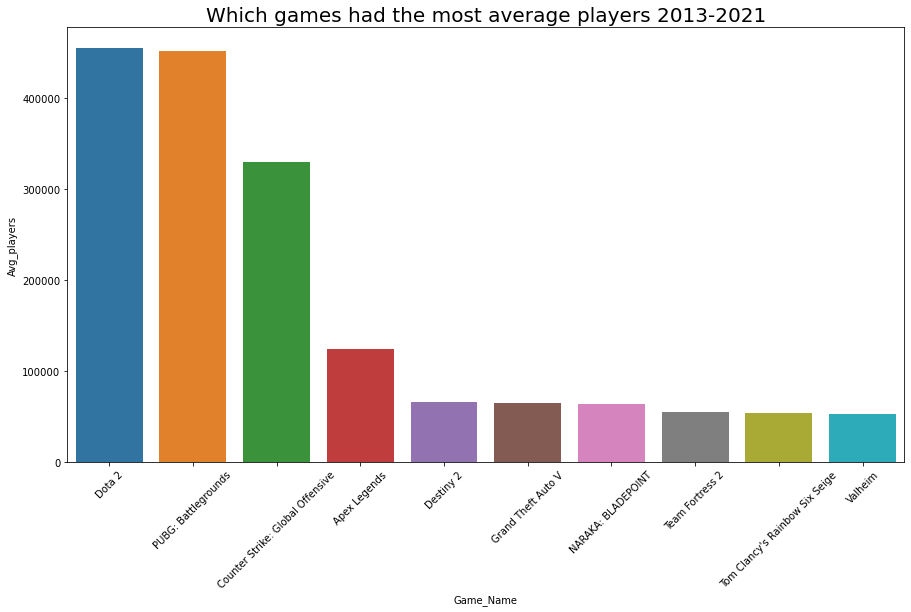

In [237]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Game_Name', y='Avg_players', data=sd2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Which games had the most average players 2013-2021', size=20)



In [238]:
sd3 = data_clean.groupby('Game_Name', as_index=False, sort=True)[
    'Peak_Players'].mean()
sd3 = sd3.sort_values('Peak_Players', ascending=False)
sd3.head(10)


,Game_Name,Peak_Players
54,PUBG: Battlegrounds,998869.925926
23,Dota 2,784588.000000
13,Counter Strike: Global Offensive,577124.881818
3,Apex Legends,234866.200000
48,NARAKA: BLADEPOINT,160720.000000
20,Destiny 2,130109.739130
40,Grand Theft Auto V,127191.636364
84,Valheim,122327.571429
79,Tom Clancy's Rainbow Six Seige,101828.159420
46,Monster Hunter: World,89808.540541


In [239]:
print(sd3.head(10).to_csv("sd3.csv"))

None


In [240]:
sd4 = pd.read_csv('sd3.csv')
sd4


,Unnamed: 0,Game_Name,Peak_Players
0,54,PUBG: Battlegrounds,998869.925926
1,23,Dota 2,784588.000000
2,13,Counter Strike: Global Offensive,577124.881818
3,3,Apex Legends,234866.200000
4,48,NARAKA: BLADEPOINT,160720.000000
5,20,Destiny 2,130109.739130
6,40,Grand Theft Auto V,127191.636364
7,84,Valheim,122327.571429
8,79,Tom Clancy's Rainbow Six Seige,101828.159420
9,46,Monster Hunter: World,89808.540541


Text(0.5, 1.0, 'Which game had the most players at one time, 2013-2021')

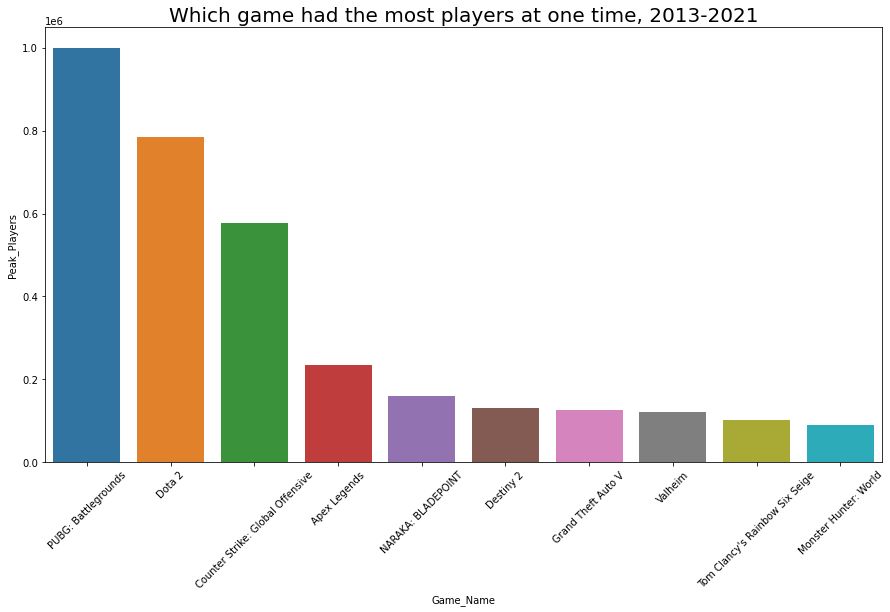

In [241]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Game_Name', y='Peak_Players', data=sd4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Which game had the most players at one time, 2013-2021', size=20)

In [242]:
data_clean.groupby('Game_Name', as_index=False, sort=False)[
    'Peak_Players'].sum()
sd5 = data_clean.sort_values('Peak_Players', ascending=False)
sd5


,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
266,2018-01-01,1584886,148728.26,+10.36%,3236027,https://steamcharts.com/app/578080,2018-01-01,PUBG: Battlegrounds
267,2017-12-01,1436158,101988.42,+7.64%,3080769,https://steamcharts.com/app/578080,2017-12-01,PUBG: Battlegrounds
265,2018-02-01,1391015,-193871.48,-12.23%,2934761,https://steamcharts.com/app/578080,2018-02-01,PUBG: Battlegrounds
268,2017-11-01,1334170,247531.23,+22.78%,2915723,https://steamcharts.com/app/578080,2017-11-01,PUBG: Battlegrounds
264,2018-03-01,1295408,-95606.71,-6.87%,2799269,https://steamcharts.com/app/578080,2018-03-01,PUBG: Battlegrounds
...,...,...,...,...,...,...,...,...
3333,2013-06-01,0,0.00,+NaN%,0,https://steamcharts.com/app/236850,2013-06-01,Europa Universalis IV
3332,2013-07-01,0,0.00,+NaN%,0,https://steamcharts.com/app/236850,2013-07-01,Europa Universalis IV
950,2012-12-01,0,0.00,+NaN%,0,https://steamcharts.com/app/218620,2012-12-01,PAYDAY 2
953,2012-09-01,0,0.00,+NaN%,0,https://steamcharts.com/app/218620,2012-09-01,PAYDAY 2


In [243]:
data_clean.groupby('Game_Name', as_index=False, sort=False)[
    'Peak_Players'].mean()
sd5 = data_clean.sort_values('Peak_Players', ascending=False)
sd6 = sd5.head(200)
sd6


,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
266,2018-01-01,1584886,148728.26,+10.36%,3236027,https://steamcharts.com/app/578080,2018-01-01,PUBG: Battlegrounds
267,2017-12-01,1436158,101988.42,+7.64%,3080769,https://steamcharts.com/app/578080,2017-12-01,PUBG: Battlegrounds
265,2018-02-01,1391015,-193871.48,-12.23%,2934761,https://steamcharts.com/app/578080,2018-02-01,PUBG: Battlegrounds
268,2017-11-01,1334170,247531.23,+22.78%,2915723,https://steamcharts.com/app/578080,2017-11-01,PUBG: Battlegrounds
264,2018-03-01,1295408,-95606.71,-6.87%,2799269,https://steamcharts.com/app/578080,2018-03-01,PUBG: Battlegrounds
...,...,...,...,...,...,...,...,...
206,2013-10-01,329677,17252.88,+5.52%,581615,https://steamcharts.com/app/570,2013-10-01,Dota 2
63,2016-06-01,334311,-4427.34,-1.31%,579110,https://steamcharts.com/app/730,2016-06-01,Counter Strike: Global Offensive
26,2019-07-01,393782,4406.10,+1.13%,578933,https://steamcharts.com/app/730,2019-07-01,Counter Strike: Global Offensive
77,2015-04-01,291748,23752.43,+8.86%,568556,https://steamcharts.com/app/730,2015-04-01,Counter Strike: Global Offensive


In [244]:
game_name_group = data_clean.groupby('Game_Name')['Game_Name'].count()
game_name_group

Game_Name
7 Days to Die                             93
ARK: Survival Evolved                     76
Age of Empires II: Definitive Edition     22
Apex Legends                              10
Arma 3                                   102
                                        ... 
World of Warships                         47
Yu-Gi-Oh! Duel Links                      46
eFootball PES 2021 SEASON UPDATE          12
tModLoader                                16
雀魂麻将(MahjongSoul)                         14
Name: Game_Name, Length: 94, dtype: int64

In [245]:
pubg = data_clean.groupby("Game_Name")

pubg2 = pubg.get_group('PUBG: Battlegrounds')

In [246]:
pubg3 = pubg2.head(100)
pubg3

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
222,2021-09-01,167102,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,PUBG: Battlegrounds
223,2021-08-01,184828,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,PUBG: Battlegrounds
224,2021-07-01,186249,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,PUBG: Battlegrounds
225,2021-06-01,179338,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,PUBG: Battlegrounds
226,2021-05-01,184701,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,PUBG: Battlegrounds
227,2021-04-01,186110,-7003.53,-3.63%,453579,https://steamcharts.com/app/578080,2021-04-01,PUBG: Battlegrounds
228,2021-03-01,193114,-5843.34,-2.94%,464480,https://steamcharts.com/app/578080,2021-03-01,PUBG: Battlegrounds
229,2021-02-01,198957,-2289.67,-1.14%,447390,https://steamcharts.com/app/578080,2021-02-01,PUBG: Battlegrounds
230,2021-01-01,201247,12013.61,+6.35%,451998,https://steamcharts.com/app/578080,2021-01-01,PUBG: Battlegrounds
231,2020-12-01,189233,9713.32,+5.41%,444680,https://steamcharts.com/app/578080,2020-12-01,PUBG: Battlegrounds


In [247]:
fig = px.line(pubg3, x="Month_Year", y="Avg_players", color='Game_Name', title='PUBG Avg Players Over the Years')
fig.show()

In [248]:
csgo = data_clean.groupby('Game_Name')

csgo2 = csgo.get_group('Counter Strike: Global Offensive')

In [249]:
csgo3 = csgo2.head(100)
csgo3

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,2021-09-01,512350,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,2021-08-01,512081,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,2021-07-01,506067,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,2021-06-01,549347,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,2021-05-01,659888,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
95,2013-10-01,27902,223.23,+0.81%,53263,https://steamcharts.com/app/730,2013-10-01,Counter Strike: Global Offensive
96,2013-09-01,27678,1717.06,+6.61%,52052,https://steamcharts.com/app/730,2013-09-01,Counter Strike: Global Offensive
97,2013-08-01,25961,5469.33,+26.69%,50511,https://steamcharts.com/app/730,2013-08-01,Counter Strike: Global Offensive
98,2013-07-01,20492,2372.68,+13.09%,42149,https://steamcharts.com/app/730,2013-07-01,Counter Strike: Global Offensive


In [250]:
csgo4 = px.line(csgo3, x="Month_Year", y="Avg_players", title='CSGO Avg Players Over the Years')
csgo4.show()

In [251]:
dota = data_clean.groupby('Game_Name')

dota2 = dota.get_group('Dota 2')

In [252]:
dota3 = dota2.head(100)
dota3

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
111,2021-09-01,391082,-33898.09,-7.98%,666838,https://steamcharts.com/app/570,2021-09-01,Dota 2
112,2021-08-01,424980,1823.99,+0.43%,699613,https://steamcharts.com/app/570,2021-08-01,Dota 2
113,2021-07-01,423156,1646.22,+0.39%,707406,https://steamcharts.com/app/570,2021-07-01,Dota 2
114,2021-06-01,421509,6365.00,+1.53%,734277,https://steamcharts.com/app/570,2021-06-01,Dota 2
115,2021-05-01,415144,1360.00,+0.33%,672307,https://steamcharts.com/app/570,2021-05-01,Dota 2
...,...,...,...,...,...,...,...,...
206,2013-10-01,329677,17252.88,+5.52%,581615,https://steamcharts.com/app/570,2013-10-01,Dota 2
207,2013-09-01,312424,-18295.30,-5.53%,566715,https://steamcharts.com/app/570,2013-09-01,Dota 2
208,2013-08-01,330720,92919.98,+39.07%,520532,https://steamcharts.com/app/570,2013-08-01,Dota 2
209,2013-07-01,237800,27575.26,+13.12%,422617,https://steamcharts.com/app/570,2013-07-01,Dota 2


In [253]:
dota4 = px.line(dota3, x="Month_Year", y="Avg_players", title='Dota 2 Avg Players Over the Years')
dota4.show()


In [254]:
fig = px.line(data_clean,
              x='Month_Year',
              y='Avg_players',
              color='Game_Name')

fig.update_traces({"line":{"color":"lightgrey"}})

fig.update_traces(patch={"line":{"color":"blue", "width":5}},
                  selector={"legendgroup":"Counter Strike: Global Offensive"})

fig.update_traces(patch={"line":{"color":"red", "width":5}},
                  selector={"legendgroup":"Dota 2"})

fig.update_traces(patch={"line":{"color":"green", "width":5}},
                  selector={"legendgroup":"PUBG: Battlegrounds"})

fig.update_traces(patch={"line":{"color": "purple", "width":5}},
                  selector={"legendgroup": "Apex Legends"})

fig.update_layout(title="Top Games with Average Players 2013-2021",
                  showlegend=False,
                  yaxis={"visible":False})

fig.show()



In [255]:
# Sorting the dataframe
sorted_df = data_clean.copy()

# map the value order
sorted_df["order"] = sorted_df["Game_Name"].map({"Counter Strike: Global Offensive": 1,
                                                 "Dota 2": 2,
                                                 "PUBG: Battlegrounds": 3,
                                                 "Apex Legends": 4}).fillna(5)

sorted_df.sort_values(by=["order", "Game_Name"], ascending=False,
                      inplace=True)


In [256]:

fig = px.line(sorted_df,
              x='Month_Year',
              y='Avg_players',
              color='Game_Name')

fig.update_traces({"line":{"color":"lightgrey"}})

fig.update_traces(patch={"line":{"color":"blue", "width":5}},
                  selector={"legendgroup":"Counter Strike: Global Offensive"})

fig.update_traces(patch={"line":{"color":"red", "width":5}},
                  selector={"legendgroup":"Dota 2"})

fig.update_traces(patch={"line":{"color":"green", "width":5}},
                  selector={"legendgroup":"PUBG: Battlegrounds"})

fig.update_traces(patch={"line":{"color":"purple", "width":5}},
                  selector={"legendgroup": "Apex Legends"})

fig.update_layout(title="Top Games with Average Players 2013-2021",
                  showlegend=False,
                  yaxis={"visible":False})

fig.show()

In [257]:
fig = px.line(sorted_df,
              x='Month_Year',
              y='Peak_Players',
              color='Game_Name')

fig.update_traces({"line":{"color":"lightgrey"}})

fig.update_traces(patch={"line":{"color":"blue", "width":5}},
                  selector={"legendgroup":"Counter Strike: Global Offensive"})

fig.update_traces(patch={"line":{"color":"red", "width":5}},
                  selector={"legendgroup":"Dota 2"})

fig.update_traces(patch={"line":{"color":"green", "width":5}},
                  selector={"legendgroup":"PUBG: Battlegrounds"})

fig.update_traces(patch={"line":{"color":"purple", "width":5}},
                  selector={"legendgroup": "Apex Legends"})

fig.update_layout(title="Top Games with Peak Amount of Players 2013-2021",
                  showlegend=False,
                  yaxis={"visible":False})

fig.show()


In [258]:
pd.options.plotting.backend = "plotly"
data_clean.plot(x='Month_Year', y=['Avg_players', 'Peak_Players'], template='plotly_dark')

In [262]:
avg = steam_df.copy()
columns_to_drop = ['Peak_Players', 'Gain', 'Percent_Gain', 'URL', 'Gain']
avg.drop(columns_to_drop, axis='columns', inplace=True)

csgo = avg[avg['Game_Name'] == 'Counter Strike: Global Offensive']
dota = avg[avg['Game_Name'] == 'Dota 2']
pubg = avg[avg['Game_Name'] == 'PUBG: Battlegrounds']
apex = avg[avg['Game_Name'] == 'Apex Legends']

csgo = csgo.head(100)
dota = dota.head(100)
pubg = pubg.head(100)
apex = apex.head(100)

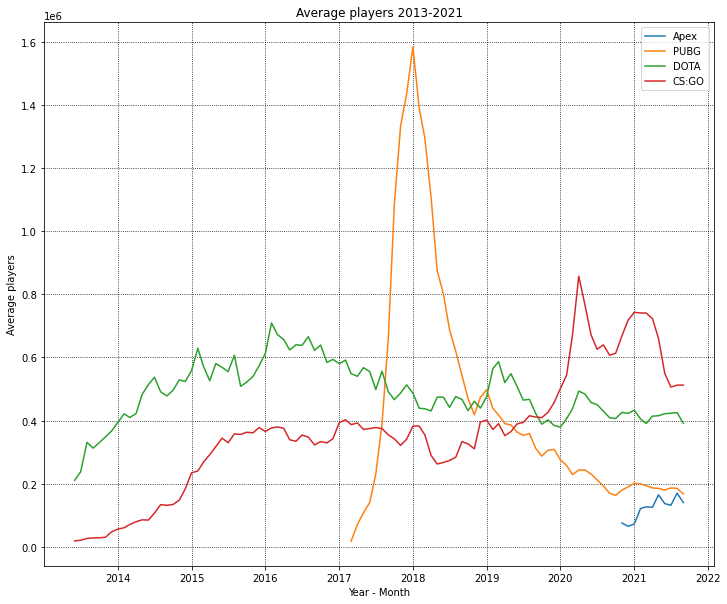

In [265]:
rcParams['figure.figsize'] = 12,10
plt.plot(apex['Month_Year'], apex['Avg_players'])
plt.plot(pubg['Month_Year'], pubg['Avg_players'])
plt.plot(dota['Month_Year'], dota['Avg_players'])
plt.plot(csgo['Month_Year'], csgo['Avg_players'])
plt.grid(True, color='k', linestyle=':')
plt.title("Average players 2013-2021")
plt.xlabel('Year - Month')
plt.ylabel('Average players')
plt.legend(['Apex', 'PUBG', 'DOTA', 'CS:GO']);